In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
stats_data = pd.read_csv('/content/drive/My Drive/krishna/my/Sheet_1_Full_Data_data.csv')

In [ ]:
stats_data.head()

Country  Year  % Yes (of any degree)
0          India  2018                     37
1         Brazil  2018                     29
2  United States  2018                     26
3        Belgium  2018                     25
4   South Africa  2018                     26

In [ ]:
data  = pd.read_csv('/content/drive/My Drive/krishna/my/memegenerator.csv')

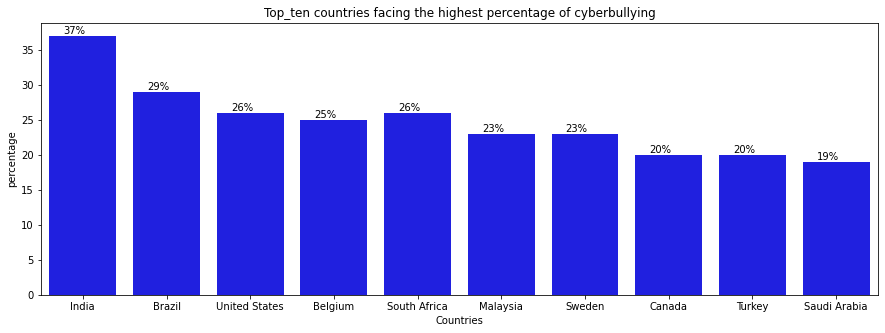

In [ ]:
COLOR = 'black'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
plt.figure(figsize =(15,5))
stats_plot = sb.barplot(stats_data['Country'].head(10),stats_data['% Yes (of any degree)'].head(10),color='blue')

plt.xlabel('Countries')
plt.ylabel('percentage')
plt.title('Top_ten countries facing the highest percentage of cyberbullying')

for p in stats_plot.patches:
        stats_plot.annotate('{:.0f}%'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')

plt.show()

In [ ]:
data.head()

Meme ID  ...                                     Alternate Text
0  10509464  ...                                        seems legit
1  12285257  ...  Fret not I stayed at a Holiday Inn Express las...
2  20612245  ...  hello airplanes? yeah, this is blimps. Yeah, y...
3  20614628  ...  LEGS IN COVER. TOO HOT. LEGS OUT OF COVER. TOO...
4  24194267  ...  one does not simply  put toothpaste back in th...

[5 rows x 7 columns]

In [ ]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57652 entries, 0 to 57651
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Meme ID               57652 non-null  object 
 1   Archived URL          57652 non-null  object 
 2   Base Meme Name        57645 non-null  object 
 3   Meme Page URL         57377 non-null  object 
 4   MD5 Hash              57644 non-null  object 
 5   File Size (In Bytes)  57644 non-null  float64
 6   Alternate Text        57347 non-null  object 
dtypes: float64(1), object(6)
memory usage: 3.1+ MB


In [ ]:
data.isnull().sum()

Meme ID                   0
Archived URL              0
Base Meme Name            7
Meme Page URL           275
MD5 Hash                  8
File Size (In Bytes)      8
Alternate Text          305
dtype: int64

In [ ]:
kk = data.drop(['Archived URL','Meme Page URL','MD5 Hash','File Size (In Bytes)'],axis=1)

In [ ]:
kk.head()

Meme ID  ...                                     Alternate Text
0  10509464  ...                                        seems legit
1  12285257  ...  Fret not I stayed at a Holiday Inn Express las...
2  20612245  ...  hello airplanes? yeah, this is blimps. Yeah, y...
3  20614628  ...  LEGS IN COVER. TOO HOT. LEGS OUT OF COVER. TOO...
4  24194267  ...  one does not simply  put toothpaste back in th...

[5 rows x 3 columns]

In [ ]:
kk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57652 entries, 0 to 57651
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Meme ID         57652 non-null  object
 1   Base Meme Name  57645 non-null  object
 2   Alternate Text  57347 non-null  object
dtypes: object(3)
memory usage: 1.3+ MB


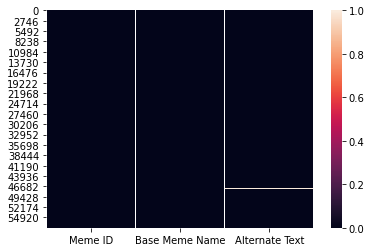

In [ ]:
import seaborn as sb

sb.heatmap(kk.isnull(),cbar=True)
plt.show()

In [ ]:
kk.isnull().sum()

Meme ID             0
Base Meme Name      7
Alternate Text    305
dtype: int64

In [ ]:
kk.dropna(inplace=True)

In [ ]:
kk.isnull().sum()


Meme ID           0
Base Meme Name    0
Alternate Text    0
dtype: int64

In [ ]:
drop_data1 = kk[kk['Alternate Text'].str.isalnum() == True]
drop_data1.count()

Meme ID           814
Base Meme Name    814
Alternate Text    814
dtype: int64

In [ ]:
kk = kk.drop(drop_data1.index)

In [ ]:
# Dropping these wanted numeric values

kk = kk.drop([427,644,646,659,730,820,1270,1271,1553,2814,3765,3787,4342,5401,5970,6360,6429,6741,7571,8997,9932,10222,10708 \
             ,10916,11076,11271,11721,12020,12224,12544,12924,13175,13458,13490,13644,13645,14164,14708,14834,14895,14959,15125,15179,15187])

In [ ]:
newdf= kk
newdf.count()

Meme ID           56483
Base Meme Name    56483
Alternate Text    56483
dtype: int64

In [ ]:
newdf.head(10)

Meme ID  ...                                     Alternate Text
0  10509464  ...                                        seems legit
1  12285257  ...  Fret not I stayed at a Holiday Inn Express las...
2  20612245  ...  hello airplanes? yeah, this is blimps. Yeah, y...
3  20614628  ...  LEGS IN COVER. TOO HOT. LEGS OUT OF COVER. TOO...
4  24194267  ...  one does not simply  put toothpaste back in th...
5  10178734  ...                              Вступи в группу блядь
6  10178750  ...                                    Тренажёрный зал
7  10178758  ...         Если женя   ашот то почему у него ник wonk
8  10178763  ...                    Тренажёрный зал не не не слышал
9  10178766  ...  usar mal este meme que de todas maneras lo sub...

[10 rows x 3 columns]

In [ ]:
import nltk
from wordcloud import WordCloud

In [ ]:
ll = " ".join(newdf['Alternate Text'].values)

In [ ]:
word_cloud = WordCloud().generate(ll)

In [ ]:
word_cloud = WordCloud(width=800,height=800,
                       background_color='white',
                       max_words=150).\
generate(ll)

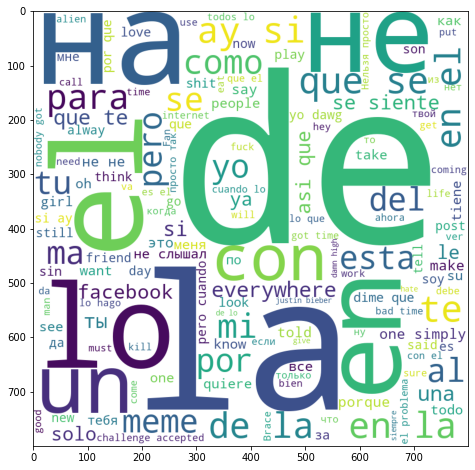

In [ ]:
plt.figure(figsize=[8,8])
plt.imshow(word_cloud)
plt.show()

In [ ]:
from tqdm import tqdm

In [ ]:
pip install googletrans

     |████████████████████████████████| 61kB 2.9MB/s 
     |████████████████████████████████| 51kB 5.2MB/s 
     |████████████████████████████████| 942kB 8.5MB/s 
     |████████████████████████████████| 61kB 7.8MB/s 
     |████████████████████████████████| 71kB 8.0MB/s 
     |████████████████████████████████| 102kB 9.1MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-cp36-none-any.whl size=15736 sha256=5292cf4af81e999d67833028ec42bea031e2b9e1e9dcbb61c0303b6b0548200a
  Stored in directory: /root/.cache/pip/wheels/28/1a/a7/eaf4d7a3417a0c65796c547cff4deb6d79c7d14c2abd29273e
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=44fb10b949eb9d5835365cee85268cb955c274c0fd162e6b9431bc80b25a8d62
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built googletrans contextvars


In [ ]:
from googletrans import Translator
translator = Translator(service_urls=[
      'translate.google.com',])

In [ ]:
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
all_terms = word_tokenize(ll.lower())

In [ ]:
stop_nltk = stopwords.words(['hungarian','swedish','kazakh','norwegian', \
                             'finnish','arabic','indonesian','portuguese','turkish', \
                            'azerbaijani','slovene','spanish','danish','nepali','romanian','greek',\
                            'dutch','tajik','german','english','russian','french','italian'])

In [ ]:
stop_updated = stop_nltk + ["...","..","n't","got","memegenerator net","do not","get"]

In [ ]:
kll = [term for term in all_terms \
if term not in stop_updated and term 
                    not in list(punctuation) and len(term)>2]

In [ ]:
u =[]
k =[]
for i in kll:
  if i == "memegenerator net":
    u.append(i)
  else:
    k.append(i)

In [ ]:
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not","n't":"not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","dont": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would", "got" : "get",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}




In [ ]:
# Regular expression for finding contractions
import re

contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

In [ ]:
# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
 def replace(match):
    return contractions_dict[match.group(0)]
 return contractions_re.sub(replace, text)

# Expanding Contractions in the reviews
newdf['clean_text']=newdf['clean_text'].apply(lambda x:expand_contractions(x))

In [ ]:
newdf['clean_text']=newdf['clean_text'].apply(lambda x: re.sub('\w*\d\w*','', x))


In [ ]:
from nltk.stem import WordNetLemmatizer
lemm = WordNetLemmatizer()

In [ ]:
def clean_txt(sent):
    sk = []
    toks= []
    tokens = word_tokenize(sent.lower())
    for tks in tokens:
      if tks == "memegenerator net":
        sk.append(tks)
      else:
        toks.append(tks)
    lemmed = [lemm.lemmatize(term) for term in toks \
               if term not in stop_updated and \
                term not in list(punctuation) and len(term) > 2] 
    res = " ".join(lemmed)
    return res

In [ ]:
newdf['clean_text'] = newdf['Alternate Text'].apply(clean_txt)

In [ ]:
newdf.head(10)

Meme ID  ...                                         clean_text
0  10509464  ...                                        seems legit
1  12285257  ...             fret stayed holiday express last night
2  20612245  ...                 hello airplane yeah blimp yeah win
3  20614628  ...  leg cover hot leg cover cold leg right scared ...
4  24194267  ...                    simply put toothpaste back tube
5  10178734  ...                                вступи группу блядь
6  10178750  ...                                    тренажёрный зал
7  10178758  ...                          женя ашот почему ник wonk
8  10178763  ...                             тренажёрный зал слышал
9  10178766  ...                   usar mal meme toda maneras suban

[10 rows x 4 columns]

In [ ]:
bb = " ".join(newdf['clean_text'].values)
word_cloud = WordCloud(width=800,height=800,
                       background_color='black',
                       max_words=200).\
generate(bb)

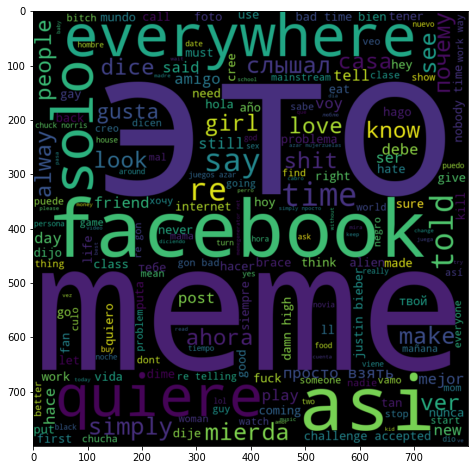

In [ ]:
plt.figure(figsize=[8,8])
plt.imshow(word_cloud, interpolation='bilinear')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

unigram_count_vectorizer = CountVectorizer(max_features=2000)

Input_unigram = unigram_count_vectorizer.fit_transform(newdf['clean_text'])

DTM_unigram = pd.DataFrame(Input_unigram.toarray(),columns = unigram_count_vectorizer.get_feature_names())


In [ ]:
DTM_sum_uni = DTM_unigram.sum().sort_values(ascending=False)

In [ ]:
temp2 = DTM_sum_uni.reset_index()
temp2.columns = ['clean_text','count']
temp2.head(5)

clean_text  count
0       like   1163
1       time    803
2        это    744
3         re    714
4       meme    692

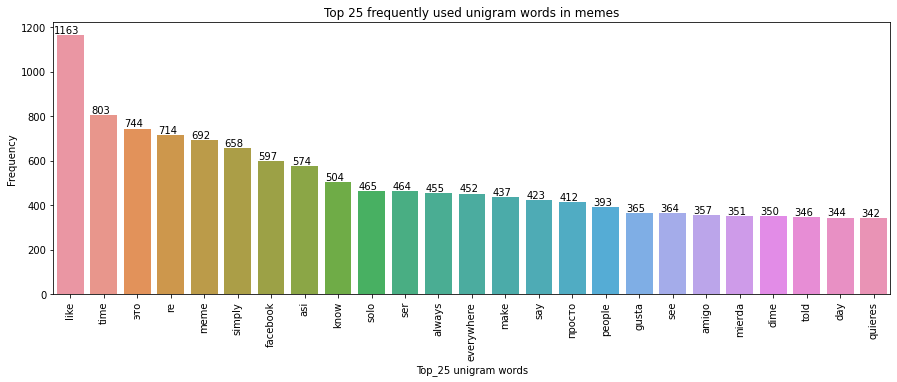

In [ ]:
COLOR = 'black'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
plt.figure(figsize =(15,5))
plot = sb.barplot(DTM_sum_uni.head(25).index,DTM_sum_uni.head(25).values)
plt.xticks(rotation=90)
plt.xlabel('Top_25 unigram words')
plt.ylabel('Frequency')
plt.title('Top 25 frequently used unigram words in memes')

for p in plot.patches:
        plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')

plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

bigram_count_vectorizer = CountVectorizer(ngram_range=(2,2),max_features=200)

Input_bigram = bigram_count_vectorizer.fit_transform(newdf['clean_text'])

DTM_bigram = pd.DataFrame(Input_bigram.toarray(),columns = bigram_count_vectorizer.get_feature_names())


In [ ]:
DTM_bigram.head()

000 000  aaand gone  ...  это стало  это терпеть
0      0.0         0.0  ...        0.0          0.0
1      0.0         0.0  ...        0.0          0.0
2      0.0         0.0  ...        0.0          0.0
3      0.0         0.0  ...        0.0          0.0
4      0.0         0.0  ...        0.0          0.0

[5 rows x 200 columns]

In [ ]:
DTM_sum = DTM_bigram.sum().sort_values(ascending=False)

In [ ]:
temp1 = DTM_sum.head(5).reset_index()
temp1.columns = ['clean_text','count']
temp1.head(5)

clean_text  count
0        просто взять    254
1  challenge accepted    209
2         nobody time    178
3            bad time    170
4       justin bieber    161

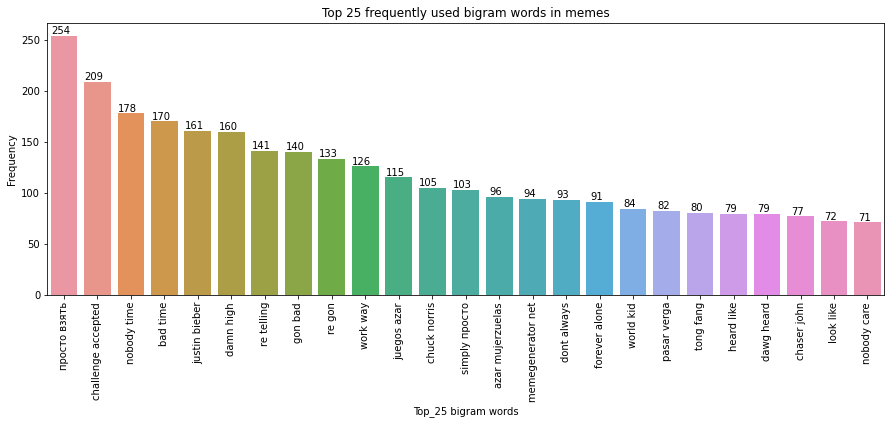

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb

COLOR = 'black'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
plt.figure(figsize =(15,5))
plot = sb.barplot(DTM_sum.head(25).index,DTM_sum.head(25).values)
plt.xticks(rotation=90)
plt.xlabel('Top_25 bigram words')
plt.ylabel('Frequency')
plt.title('Top 25 frequently used bigram words in memes')

for p in plot.patches:
        plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')

plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

trigram_count_vectorizer = CountVectorizer(ngram_range=(3,3),max_features=200)

Input_trigram= trigram_count_vectorizer.fit_transform(newdf['clean_text'])

DTM_trigram = pd.DataFrame(Input_trigram.toarray(),columns = trigram_count_vectorizer.get_feature_names())


In [ ]:
DTM_trigram.head()

000 000 000  10 000 race  ...  это стало мейнстримом  это черный расизм
0            0            0  ...                      0                  0
1            0            0  ...                      0                  0
2            0            0  ...                      0                  0
3            0            0  ...                      0                  0
4            0            0  ...                      0                  0

[5 rows x 1000 columns]

In [ ]:
DTM_sum_tri = DTM_trigram.sum().sort_values(ascending=False)

In [ ]:
{'postive':.02,negative:.3 , neutral.6 ,compound:.339}

In [ ]:
temp2 =DTM_sum_tri.reset_index()
temp2.columns =['clean_text','count']
temp2.head()

clean_text  count
0             gon bad time    139
1               re gon bad    116
2      simply просто взять     97
3  juegos azar mujerzuelas     94
4          dawg heard like     63

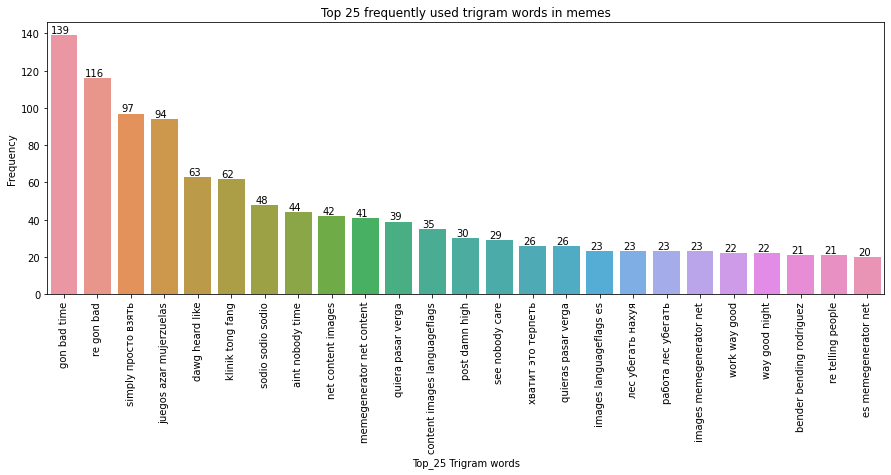

In [ ]:
COLOR = 'black'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

plt.figure(figsize =(15,5))
plot = sb.barplot(DTM_sum_tri.head(25).index,DTM_sum_tri.head(25).values)
plt.xticks(rotation=90)
plt.xlabel('Top_25 Trigram words')
plt.ylabel('Frequency')
plt.title('Top 25 frequently used trigram words in memes')

for p in plot.patches:
        plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')

plt.show()

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score,confusion_matrix

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
analyser = SentimentIntensityAnalyzer()

def vader_class_prediction(score):
    
    sentiment_dict = analyser.polarity_scores(score) 
    
    if sentiment_dict['compound'] >= 0.01 : 
        vader_class = "Positive"
  
    elif sentiment_dict['compound'] <= - 0.01 : 
        vader_class = "Negative"
  
    else : 
        vader_class = "Neutral" 
    return vader_class
  
    

In [ ]:
def get_vader_sentiment_score(text):
    return analyser.polarity_scores(text)['compound'] 

In [ ]:
newdf['vader_score'] = newdf['Alternate Text'].apply(get_vader_sentiment_score)

In [ ]:
newdf['prediction'] = newdf['Alternate Text'].apply(vader_class_prediction)

In [ ]:
newdf.head(10)

Meme ID             Base Meme Name  ... vader_score prediction
0  10509464         Spiderman Approves  ...      0.0000    Neutral
1  12285257  Alright Then Business Kid  ...     -0.3089   Negative
2  20612245                     Archer  ...      0.8020   Positive
3  20614628               Futurama Fry  ...     -0.4404   Negative
4  24194267        One Does Not Simply  ...      0.0000    Neutral
5  10178734              Insanity Wolf  ...      0.0000    Neutral
6  10178750           Butthurt Dweller  ...      0.0000    Neutral
7  10178758              Philosoraptor  ...      0.0000    Neutral
8  10178763           Butthurt Dweller  ...      0.0000    Neutral
9  10178766         Foul Bachelor Frog  ...      0.0000    Neutral

[10 rows x 6 columns]

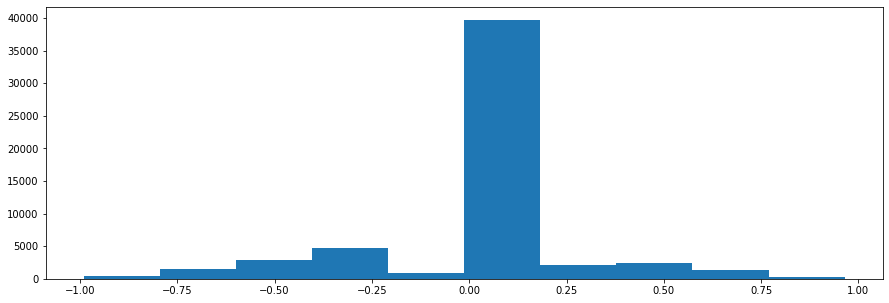

In [ ]:
COLOR = 'black'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

plt.figure(figsize =(15,5))
plot = plt.hist(newdf['vader_score'])

plt.show()


In [ ]:
c_data = newdf.prediction.value_counts()

In [ ]:
c_data1 = c_data.reset_index()
c_data1.columns = ['predicted classes', 'count']
c_data1

predicted classes  count
0           Neutral  38897
1          Negative  10437
2          Positive   7149

<Figure size 720x504 with 0 Axes>

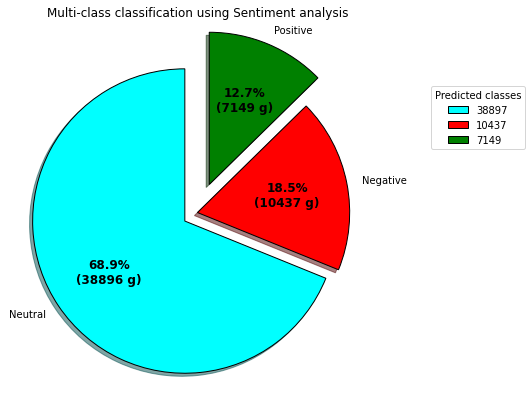

In [ ]:
fig = plt.figure(figsize =(10, 7)) 

explode = (0.1, 0.0, 0.2) 

colors = ( "cyan", "red", "green")

wp = { 'linewidth' : 1, 'edgecolor' : "black" }

def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%\n({:d} g)".format(pct, absolute) 
  
# Creating plot 
fig, ax = plt.subplots(figsize =(10, 7)) 
wedges, texts, autotexts = ax.pie(c_data,  
                                  autopct = lambda pct: func(pct, c_data), 
                                  explode = explode,  
                                  labels = c_data.index, 
                                  shadow = True, 
                                  colors = colors, 
                                  startangle = 90, 
                                  wedgeprops = wp, 
                                  textprops = dict(color ="black")) 
ax.legend(wedges, c_data, 
          title ="Predicted classes", 
          loc ="center left", 
          bbox_to_anchor =(1.1, 0, 0.5, 1.5)) 
  
plt.setp(autotexts, size = 12, weight ="bold") 
ax.set_title("Multi-class classification using Sentiment analysis") 

plt.show()

**NAVIE Bayes**

In [ ]:
from sklearn.preprocessing import LabelEncoder

x1 = LabelEncoder()
newdf['encoded_classes'] = x1.fit_transform(newdf['prediction']) 
newdf.head(10)

Meme ID             Base Meme Name  ... prediction encoded_classes
0  10509464         Spiderman Approves  ...    Neutral               1
1  12285257  Alright Then Business Kid  ...   Negative               0
2  20612245                     Archer  ...   Positive               2
3  20614628               Futurama Fry  ...   Negative               0
4  24194267        One Does Not Simply  ...    Neutral               1
5  10178734              Insanity Wolf  ...    Neutral               1
6  10178750           Butthurt Dweller  ...    Neutral               1
7  10178758              Philosoraptor  ...    Neutral               1
8  10178763           Butthurt Dweller  ...    Neutral               1
9  10178766         Foul Bachelor Frog  ...    Neutral               1

[10 rows x 7 columns]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer_bi = TfidfVectorizer(ngram_range=(2,2), max_features=200)

Input_bigram= tfidf_vectorizer_bi.fit_transform(newdf['clean_text'])

DTM_bigram = pd.DataFrame(Input_bigram.toarray(),columns = tfidf_vectorizer_bi.get_feature_names())


In [ ]:
DTM_bigram.head()

000 000  aaand gone  ...  это стало  это терпеть
0      0.0         0.0  ...        0.0          0.0
1      0.0         0.0  ...        0.0          0.0
2      0.0         0.0  ...        0.0          0.0
3      0.0         0.0  ...        0.0          0.0
4      0.0         0.0  ...        0.0          0.0

[5 rows x 200 columns]

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

In [ ]:
X = newdf.clean_text.values
target = newdf.encoded_classes.values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, target, train_size = 0.75,random_state=42)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer_uni = TfidfVectorizer( max_features=5000)
X_train_tfidf_uni = tfidf_vectorizer_uni.fit_transform(X_train)
X_test_tfidf_uni = tfidf_vectorizer_uni.transform(X_test)

In [ ]:
classifier = MultinomialNB()
classifier.fit(X_train_tfidf_uni, y_train)
traget_prediction_uni = classifier.predict(X_test_tfidf_uni)
print("confusion matrix :", confusion_matrix(y_test,traget_prediction_uni),end="\n")
print("Accuracy of bigram_Tfidf_vector", accuracy_score(y_test,traget_prediction_uni)*100)

confusion matrix : [[1171 1257  160]
 [ 162 9436  120]
 [ 251  532 1032]]
Accuracy of bigram_Tfidf_vector 82.42334112314992


In [ ]:
pd.Series(traget_prediction_uni).head(10)

0    1
1    1
2    1
3    1
4    1
5    0
6    1
7    1
8    1
9    1
dtype: int64

In [ ]:
print(classification_report(y_test,traget_prediction_uni))

              precision    recall  f1-score   support

           0       0.74      0.45      0.56      2588
           1       0.84      0.97      0.90      9718
           2       0.79      0.57      0.66      1815

    accuracy                           0.82     14121
   macro avg       0.79      0.66      0.71     14121
weighted avg       0.82      0.82      0.81     14121



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer_bi = TfidfVectorizer(ngram_range=(2,2), max_features=5000)
X_train_tfidf = tfidf_vectorizer_bi.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer_bi.transform(X_test)

In [ ]:
print(X_train_tfidf.shape,X_test_tfidf.shape)

(42362, 5000) (14121, 5000)


In [ ]:
classifier = MultinomialNB()
classifier.fit(X_train_tfidf, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
classifier = MultinomialNB()
classifier.fit(X_train_tfidf, y_train)
traget_prediction = classifier.predict(X_test_tfidf)
print("confusion matrix :", confusion_matrix(y_test,traget_prediction),end="\n")
print("Accuracy of bigram_Tfidf_vector", accuracy_score(y_test,traget_prediction)*100)

confusion matrix : [[ 379 2173   36]
 [  42 9666   10]
 [  49 1436  330]]
Accuracy of bigram_Tfidf_vector 73.47213370157921


In [ ]:
print(classification_report(y_test,traget_prediction))

              precision    recall  f1-score   support

           0       0.81      0.15      0.25      2588
           1       0.73      0.99      0.84      9718
           2       0.88      0.18      0.30      1815

    accuracy                           0.73     14121
   macro avg       0.80      0.44      0.46     14121
weighted avg       0.76      0.73      0.66     14121



In [ ]:
tfidf_vectorizer_tri = TfidfVectorizer(ngram_range=(3,3), max_features=5000)
X_train_tfidf_tri = tfidf_vectorizer_tri.fit_transform(X_train)
X_test_tfidf_tri = tfidf_vectorizer_tri.transform(X_test)

In [ ]:
print(X_train_tfidf.shape,X_test_tfidf.shape)

(42362, 5000) (14121, 5000)


In [ ]:
classifier = MultinomialNB()
classifier.fit(X_train_tfidf_tri, y_train)
traget_prediction1 = classifier.predict(X_test_tfidf_tri)
print("confusion matrix :", confusion_matrix(y_test,traget_prediction1),sep="\n")
print("Accuracy of bigram_Tfidf_vector", accuracy_score(y_test,traget_prediction1)*100)

confusion matrix :
[[ 153 2431    4]
 [   4 9711    3]
 [   7 1724   84]]
Accuracy of bigram_Tfidf_vector 70.44826853622264


In [ ]:
print(classification_report(y_test,traget_prediction1))

              precision    recall  f1-score   support

           0       0.93      0.06      0.11      2588
           1       0.70      1.00      0.82      9718
           2       0.92      0.05      0.09      1815

    accuracy                           0.70     14121
   macro avg       0.85      0.37      0.34     14121
weighted avg       0.77      0.70      0.60     14121



In [ ]:
p = pd.DataFrame([traget_prediction_uni,traget_prediction,traget_prediction1]).T
p.columns = ['1-gram','2-gram','3-gram']
p.groupby(['1-gram']).count()

# **SVM**

In [ ]:
X1 = newdf.clean_text.values
target1 = newdf.encoded_classes.values

In [ ]:
X_train1, X_test1, y_train1, y_test1 = \
    train_test_split(X1,target1, test_size = 0.20,random_state=42)

In [ ]:
tfidf_vectorizer_uni = TfidfVectorizer(max_features=3000)
X_train_tfidf_uni = tfidf_vectorizer_uni.fit_transform(X_train1)
X_test_tfidf_uni = tfidf_vectorizer_uni.transform(X_test1)

In [ ]:
svclassifier = SVC(C=1.0, kernel='linear', degree=8, gamma='auto')
svclassifier.fit(X_train_tfidf_uni, y_train1)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=8, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
predictions_SVM_uni = svclassifier.predict(X_test_tfidf_uni)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM_uni, y_test1)*100)
print("confusion matrix :", confusion_matrix(y_test1,predictions_SVM_uni),sep="\n")

SVM Accuracy Score ->  85.06683190227494
confusion matrix :
[[ 930 1007  128]
 [  62 7666   44]
 [ 121  325 1014]]


In [ ]:
print(classification_report(y_test1,predictions_SVM_uni))

              precision    recall  f1-score   support

           0       0.84      0.45      0.59      2065
           1       0.85      0.99      0.91      7772
           2       0.85      0.69      0.77      1460

    accuracy                           0.85     11297
   macro avg       0.85      0.71      0.76     11297
weighted avg       0.85      0.85      0.84     11297



In [ ]:
tfidf_vectorizer_bi1 = TfidfVectorizer(ngram_range=(2,2), max_features=10000)
X_train_tfidf_bi1 = tfidf_vectorizer_bi1.fit_transform(X_train1)
X_test_tfidf_bi1 = tfidf_vectorizer_bi1.transform(X_test1)

In [ ]:
svclassifier = SVC(C=1.0, kernel='linear', degree=8, gamma='auto')
svclassifier.fit(X_train_tfidf_bi1, y_train1)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=8, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
predictions_SVM = svclassifier.predict(X_test_tfidf_bi1)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, y_test1)*100)
print("confusion matrix :", confusion_matrix(y_test1,predictions_SVM),sep="\n")

SVM Accuracy Score ->  74.45339470655927
confusion matrix :
[[ 388 1638   39]
 [  68 7682   22]
 [  73 1046  341]]


In [ ]:
print(classification_report(y_test1,predictions_SVM))

              precision    recall  f1-score   support

           0       0.73      0.19      0.30      2065
           1       0.74      0.99      0.85      7772
           2       0.85      0.23      0.37      1460

    accuracy                           0.74     11297
   macro avg       0.77      0.47      0.50     11297
weighted avg       0.75      0.74      0.68     11297



In [ ]:
tfidf_vectorizer_3 = TfidfVectorizer(ngram_range=(3,3), max_features=10000)
X_train_tfidf_3 = tfidf_vectorizer_3.fit_transform(X_train1)
X_test_tfidf_3 = tfidf_vectorizer_3.transform(X_test1)

In [ ]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear', degree=8, gamma='auto')
svclassifier.fit(X_train_tfidf_3, y_train1)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=8, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
predictions_SVM1 = svclassifier.predict(X_test_tfidf_3)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM1, y_test1)*100)
print("confusion matrix :", confusion_matrix(y_test1,predictions_SVM1),sep="\n")

SVM Accuracy Score ->  70.92148357971143
confusion matrix :
[[ 151 1908    6]
 [   6 7762    4]
 [  15 1346   99]]


In [ ]:
print(classification_report(y_test1,predictions_SVM1))

              precision    recall  f1-score   support

           0       0.88      0.07      0.14      2065
           1       0.70      1.00      0.83      7772
           2       0.91      0.07      0.13      1460

    accuracy                           0.71     11297
   macro avg       0.83      0.38      0.36     11297
weighted avg       0.76      0.71      0.61     11297



In [ ]:
Uni_NB =accuracy_score(y_test,traget_prediction_uni)*100
BI_NB = accuracy_score(y_test,traget_prediction)*100

Tri_NB = accuracy_score(y_test,traget_prediction1)*100

SVM_uni =accuracy_score(predictions_SVM_uni, y_test1)*100
SVM_BI = accuracy_score(predictions_SVM, y_test1)*100

SVM_TRI= accuracy_score(predictions_SVM1, y_test1)*100

In [ ]:
scores = [Uni_NB,BI_NB,Tri_NB,SVM_uni,SVM_BI,SVM_TRI]
names = ['unigram','bigram','trigram','unigram','bigram','trigram']
model_names =['Navie Bayes','Navie Bayes','Navie Bayes','SVM','SVM','SVM']

accuracy_table = pd.DataFrame([model_names,names,scores]).T
accuracy_table.columns = ['model_mame','N-gram','accuracy_score (%)']

In [ ]:
accuracy_table['accuracy_score (%)'] = \
        accuracy_table['accuracy_score (%)'].apply(lambda x: x.astype(float))


In [ ]:
table = accuracy_table.pivot_table(index='model_mame', \
                columns = 'N-gram', values = 'accuracy_score (%)')
table

N-gram          bigram    trigram    unigram
model_mame                                  
Navie Bayes  73.472134  70.448269  82.423341
SVM          74.453395  70.921484  85.066832

In [ ]:
accuracy_table.groupby(['model_mame'])[['N-gram','accuracy_score (%)']].mean()

accuracy_score (%)
model_mame                     
Navie Bayes           75.447914
SVM                   76.813903

In [ ]:
from itertools import groupby
def add_line(ax, xpos, ypos):
    line = plt.Line2D([xpos, xpos], [ypos + .1, ypos],
                      transform=ax.transAxes, color='gray')
    line.set_clip_on(False)
    ax.add_line(line)

def label_len(my_index,level):
    labels = my_index.get_level_values(level)
    return [(k, sum(1 for i in g)) for k,g in groupby(labels)]

def label_group_bar_table(ax, df):
    ypos = -.1
    scale = 1./df.index.size
    for level in range(df.index.nlevels)[::-1]:
        pos = 0
        for label, rpos in label_len(df.index,level):
            lxpos = (pos + .5 * rpos)*scale
            ax.text(lxpos, ypos, label, ha='center', transform=ax.transAxes)
            add_line(ax, pos*scale, ypos)
            pos += rpos
        add_line(ax, pos*scale , ypos)
        ypos -= .1

In [ ]:
COLOR = 'black'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

plt.figure(figsize =(15,10))
plot = table.plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel('Models')
plt.ylabel('Accuracy(in %)')
plt.title('Comparative graph of accuracy_scores of  different n-gram models')

plt.ylim(0,100)

plt.show()

<Figure size 1080x720 with 0 Axes>